# Use Epileptor Time Series to Do Seizure Detection As Ground Truth

Here, we just show the initial framework of how to do absolute ground truth seizure detection using the epileptor time series signal.

This is more robust then using the z state variable (slow permitivittty) in the epileptor model.

In [ ]:
import numpy as np
import pandas as pd
import os
import scipy.io
from tvb.simulator.lab import *
import tvbsim
# np.random.seed(123456789)

# plotting fxns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
# import epi ts here


In [39]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, data)
    return y
def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='highpass', analog=False)
    return b, a
def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, data)
    return y
def butter_lowpass_filter(data, highcut, fs, order=5):
    nyq = 0.5*fs
    highcut = highcut / nyq
    b, a = butter(order, highcut, btype='lowpass', analog=False)
    
    y = scipy.signal.filtfilt(b, a, data)
    return y

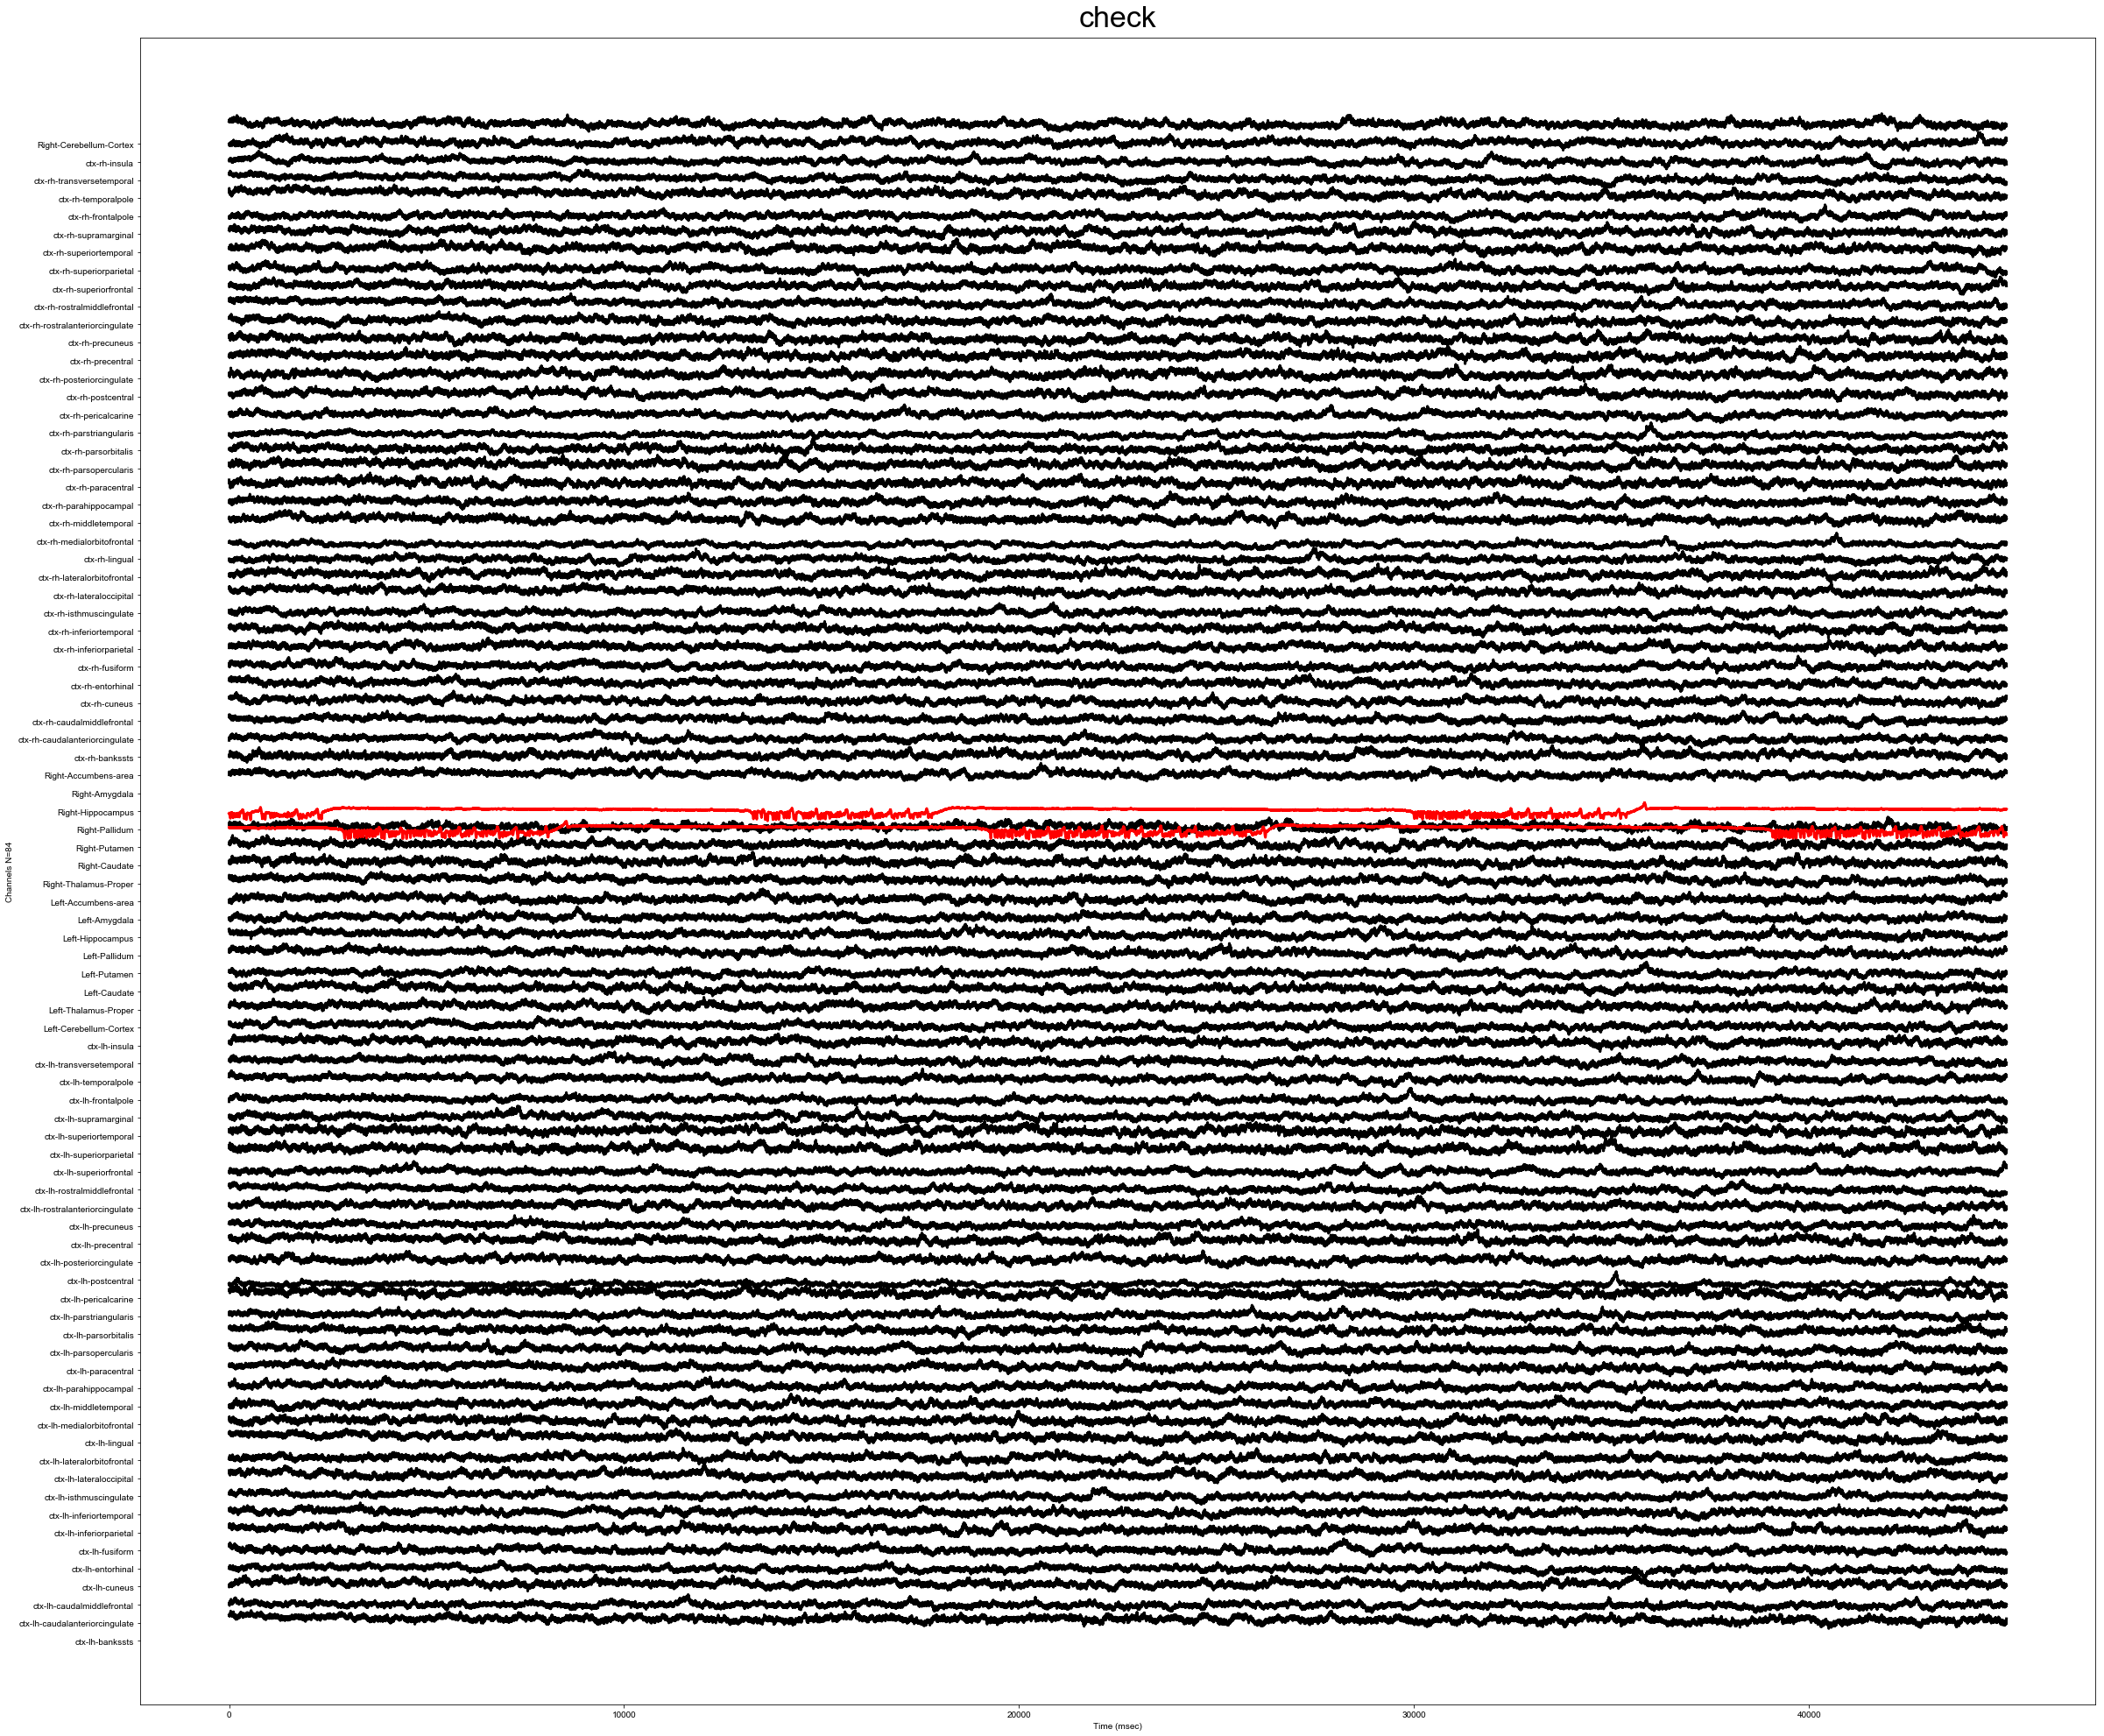

In [31]:
region_labels = maintvbexp.conn.region_labels

tsviz = tvbsim.visualize.plotts.VisualTs()
# PLOTTING THE TIME SERIES OF THE SOURCE SIGNALS
tsviz.loaddata(data=epits,ylabels=region_labels)
# visualize seegts
tsviz.setfigsize(figsize=(40,35))
titlestr = 'check'
#     titlestr = 'ID004_CV Full Clin EZ/PZ TVB Simulation'
fig, ax = tsviz.plotts(normalize=True, titlestr=titlestr)
# tsviz.plotvertlines(onsettimes=seizonsets, offsettimes=seizoffsets)
tsviz.colorts(ezinds, color='red')
# tsviz.colorts(pzinds, color='blue')

[45 46]


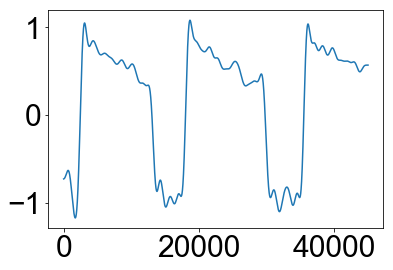

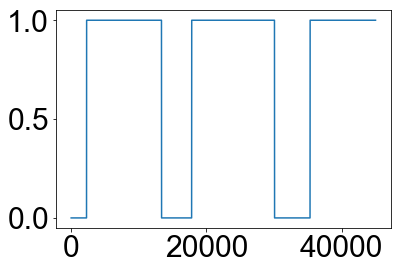

In [44]:
print(allindices)
from sklearn.preprocessing import scale
highcut = 1
fs = 1000
epits = butter_lowpass_filter(epits, highcut, fs, order=5)
# epits[45,:] = butter_lowpass_filter(epits[45,:], highcut, fs, order=5)

test = np.copy(epits[46,:])
test[test>=-0.5] = 1
test[test<-0.5] = 0

plt.figure()
plt.plot(epits[46,:])
plt.figure()
plt.plot(test)